In [1]:
from dyn_net.networks import get_network
import networkx as nx
from scipy.sparse.linalg import eigsh

In [ ]:
# ER
N_list = [1000, 2000, 4000, 8000]
records = []
for N in N_list:
    ER_params = {
        'n' : N,
        'p' : 0.5
    }
    build, p = get_network("erdos_renyi",ER_params)
    A = build(p)
    vals, vecs = eigsh(A/N, k=1, which="LA")  
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


In [ ]:
# WS
N_list = [1000, 2000, 4000, 8000]
records = []
for N in N_list:
    WS_params = {
        'n' : N,
        'k' : N/2
    }
    build, p = get_network("watts_strogatz",WS_params)
    A = build(p)
    vals, vecs = eigsh(A/N, k=1, which="LA")  
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


In [ ]:
# Power Law
N_list = [1000, 2000, 4000, 8000]
records = []
for N in N_list:
    power_law_params = {
        'n' : N,
        'alpha' : 0.3,
        'beta' : 0.4
    }
    build, p = get_network("power_law",power_law_params)
    A = build(p)
    vals, vecs = eigsh(A/N/N**(-power_law_params["beta"]), k=1, which="LA")  
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


In [ ]:
# Bistable graphon
N_list = [1000, 2000, 4000, 8000]
records = []
for N in N_list:
    params = {"n": N, "seed": 0}
    build, p = get_network("bistable_graphon", params)
    A = build(p)
    vals, vecs = eigsh(A/N, k=1, which="LA") 
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


### Configuration model networks

1. Poisson

In [ ]:
network_name = "configuration_model"

degree_distribution = {
    'name' : "poisson",
    'params' : {
        'lambda' : 500
    }
} 

N_list = [500, 1000, 2000, 4000, 8000]
records = []
for N in N_list:
    network_params = {
        'n' : N,
        'degree_distribution': degree_distribution
        }

    build, params = get_network(network_name,network_params)
    A = build(params)

    vals, vecs = eigsh(A/N, k=1, which="LA") 
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


In [6]:
network_name = "configuration_model"

degree_distribution = {
    'name' : "scale_free_cutoff",
    'params' : {
        'alpha' : 2.5,
        'k_min' : 1,
        'k_max' : 100
    }
} 

N_list = [500, 1000, 2000, 4000, 8000]
records = []
for N in N_list:
    network_params = {
        'n' : N,
        'degree_distribution': degree_distribution
        }

    build, params = get_network(network_name,network_params)
    A = build(params)

    vals, vecs = eigsh(A.astype(float), k=1, which="LA") 
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


N, avg_deg, density, eigenvalue
500 1.702 0.003404 5.8889220533344435
1000 1.655 0.001655 10.370583248824454
2000 1.784 0.000892 6.965815259400966
4000 1.749 0.00043725 10.257937902099494
8000 1.785375 0.000223171875 9.85657854295876


In [7]:
network_name = "configuration_model"

degree_distribution = {
    'name' : "scale_free_exp_cutoff",
    'params' : {
        'alpha' : 2.5,
        'xi' : 20.0,
        'k_min' : 1,
        'k_max' : 100
    }
} 

N_list = [500, 1000, 2000, 4000, 8000]
records = []
for N in N_list:
    network_params = {
        'n' : N,
        'degree_distribution': degree_distribution
        }

    build, params = get_network(network_name,network_params)
    A = build(params)

    vals, vecs = eigsh(A/N, k=1, which="LA") 
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


N, avg_deg, density, eigenvalue
500 1.504 0.003008 0.00930374592488847
1000 1.524 0.001524 0.005625539629617211
2000 1.651 0.0008255 0.003600084677900487
4000 1.51925 0.0003798125 0.0019002354827313004
8000 1.515125 0.000189390625 0.0008528439071872901


### Configuration Model

0.012
494


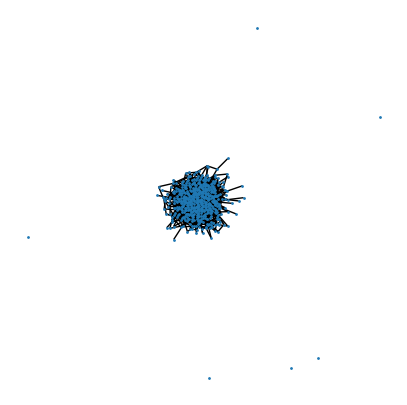

In [44]:
# Configuration model with Poisson degree distribution
import numpy as np
import networkx as nx
from dyn_net.networks.configuration_model import ConfigurationModelParams, DegreeDistributionSpec, build
from matplotlib import pyplot as plt

network_name = "configuration_model"
size = 500
degree_distribution = {
    'name' : "poisson",
    'params' : {
        'lambda' : 5
    }
} 

network_params = {
    'n' : size,
    'degree_distribution': degree_distribution
}


build_net, p_net = get_network(network_name, network_params)

A = build(p_net)
G = nx.from_scipy_sparse_array(A)

pos = nx.spring_layout(G, seed=1)
plt.figure(figsize=(5, 5))
nx.draw_networkx(G, pos=pos, node_size=1, with_labels=False)
plt.axis("off")
isolates = [n for n, d in G.degree() if d == 0]
print( len(isolates) / size )
components = list(nx.connected_components(G))
giant_size = max(len(c) for c in components)
print(giant_size)



### Truncated Power Law

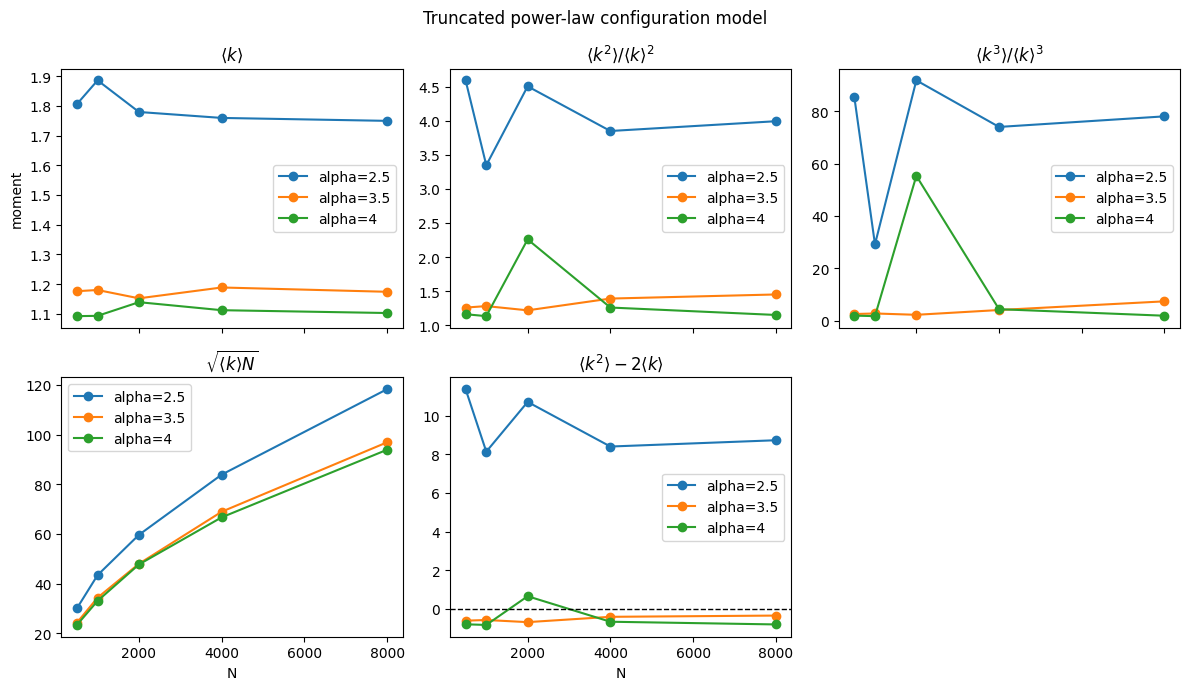

In [18]:
# Configuration model with truncated power-law (scale_free_cutoff) degree distribution
import numpy as np
from matplotlib import pyplot as plt
from dyn_net.networks import get_network

alphas = [2.5, 3.5, 4]
k_mins = [1,1,1]
k_max = 100
N_list = [500, 1000, 2000, 4000, 8000]

results = {}
for alpha,k_min in zip(alphas,k_mins):
    degree_distribution = {
        'name' : 'scale_free_cutoff',
        'params' : {
            'alpha' : alpha,
            'k_min' : k_min,
            'k_max' : k_max
        }
    }

    records = []
    for N in N_list:
        network_params = {
            'n' : N,
            'degree_distribution': degree_distribution
        }
        build, params = get_network('configuration_model', network_params)
        A = build(params)
        degrees = np.asarray(A.sum(axis=1)).ravel()
        m1 = degrees.mean()
        m2 = (degrees ** 2).mean()
        m3 = (degrees ** 3).mean()
        structural_cutoff = np.sqrt(m1 * N)
        records.append((N, m1, m2, m3, structural_cutoff))
    results[alpha] = records


# Plot moments and structural cutoff vs N
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharex=True)
for alpha in alphas:
    data = results[alpha]
    Ns = np.array([r[0] for r in data])
    m1s = np.array([r[1] for r in data])
    m2s = np.array([r[2] for r in data])
    m3s = np.array([r[3] for r in data])
    k_structs = np.array([r[4] for r in data])
    crit_vals = m2s - 2 * m1s

    axes[0, 0].plot(Ns, m1s, marker='o', label=f'alpha={alpha}')
    axes[0, 1].plot(Ns, m2s / m1s**2, marker='o', label=f'alpha={alpha}')
    axes[0, 2].plot(Ns, m3s / m1s**3, marker='o', label=f'alpha={alpha}')
    axes[1, 0].plot(Ns, k_structs, marker='o', label=f'alpha={alpha}')
    axes[1, 1].plot(Ns, crit_vals, marker='o', label=f'alpha={alpha}')

axes[0, 0].set_title(r'$\langle k \rangle$')
axes[0, 0].set_ylabel('moment')
axes[0, 1].set_title(r'$\langle k^2 \rangle / \langle k \rangle^2$')
axes[0, 2].set_title(r'$\langle k^3 \rangle / \langle k \rangle^3$')
axes[1, 0].set_title(r'$\sqrt{\langle k \rangle N }$')
axes[1, 0].set_xlabel('N')
axes[1, 1].set_title(r'$\langle k^2 \rangle - 2\langle k \rangle$')
axes[1, 1].set_xlabel('N')
axes[1, 1].axhline(0.0, color='k', linewidth=1.0, linestyle='--')

for ax in axes.ravel():
    if ax is not axes[1, 2]:
        ax.legend()

axes[1, 2].axis('off')
fig.suptitle('Truncated power-law configuration model')
fig.tight_layout()


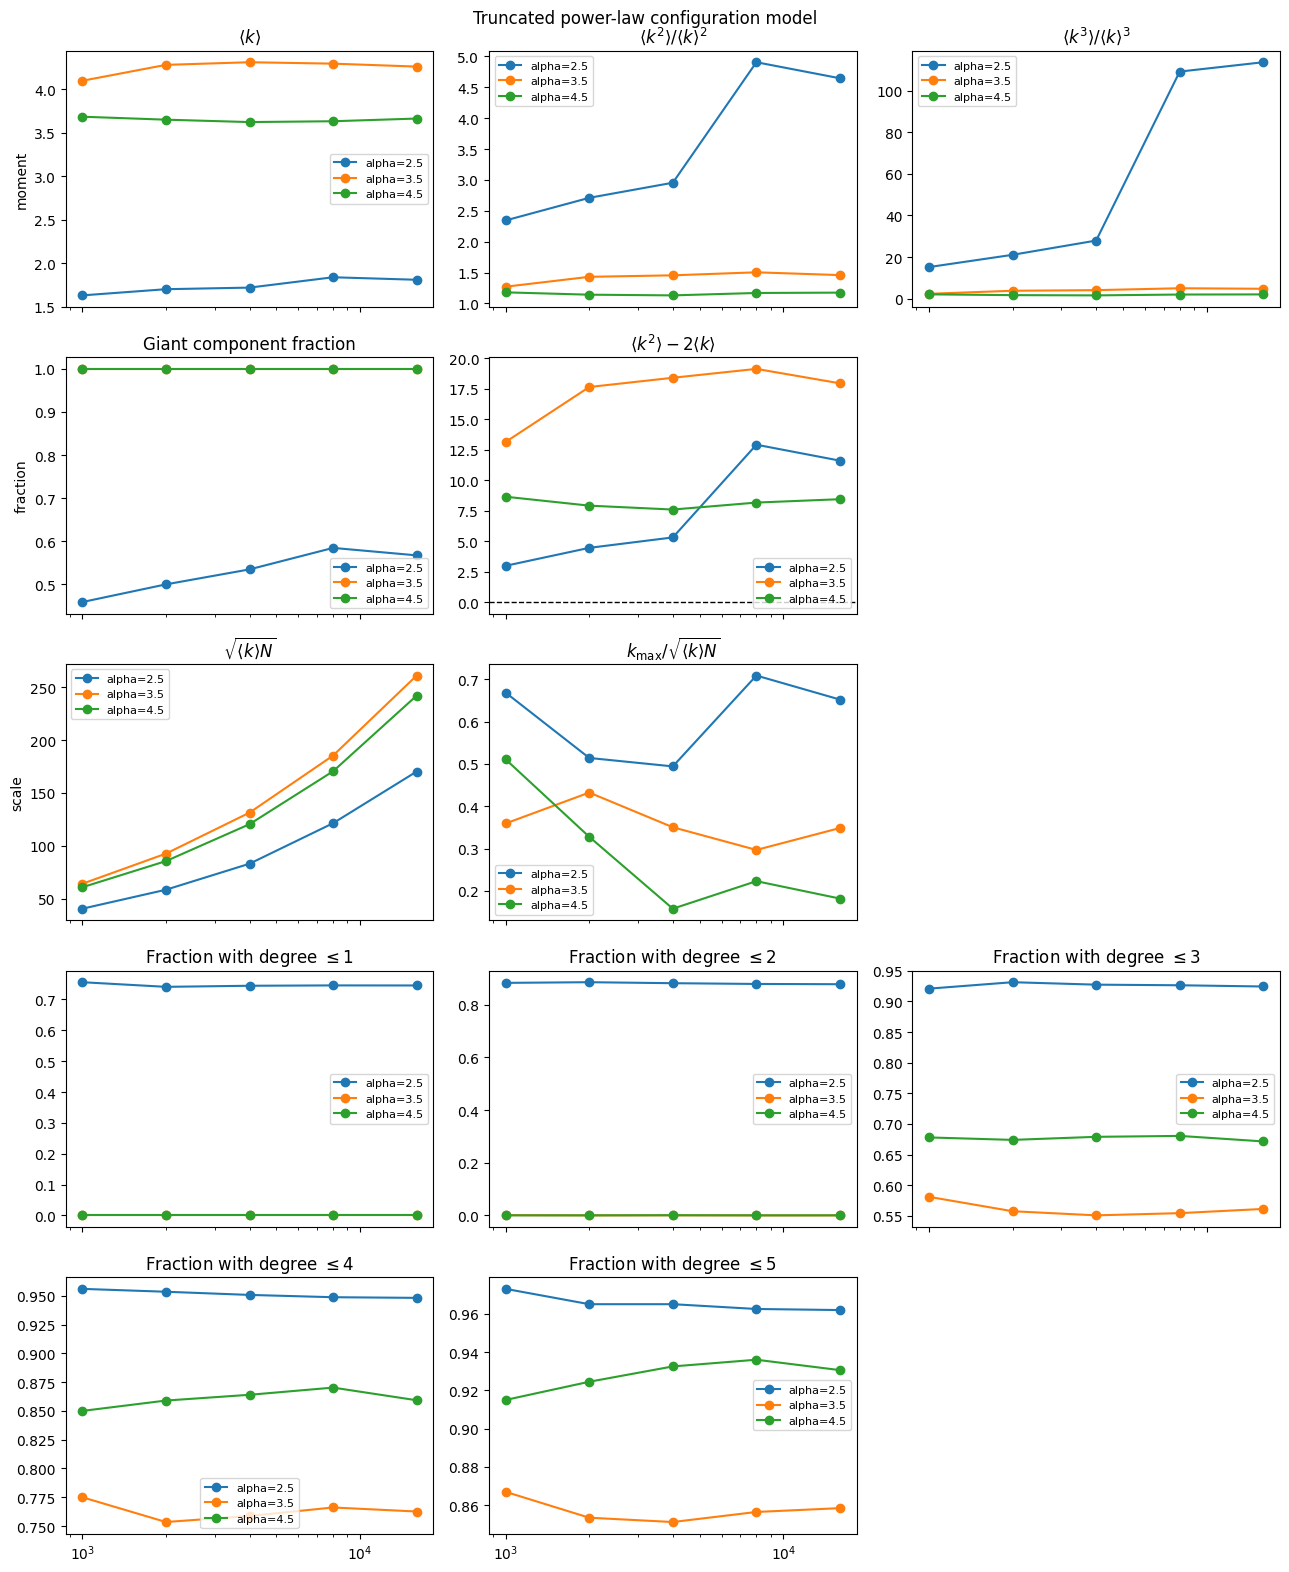

In [ ]:
# Configuration model with truncated power-law (scale_free_cutoff) degree distribution
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
from dyn_net.networks import get_network

N_list = [ 1000, 2000, 4000, 8000, 16000]
alphas = [2.5, 3.5, 4.5]
k_mins = [1,3,3]
k_max = 100


results = {}
for alpha,k_min in zip(alphas,k_mins):
    records = []
    for N in N_list:

        degree_distribution = {
            'name' : 'scale_free_cutoff',
            'params' : {
                'alpha' : alpha,
                'k_min' : k_min,
                'k_max' : k_max
            }
        }
        network_params = {
            'n' : N,
            'degree_distribution': degree_distribution
        }
        build, params = get_network('configuration_model', network_params)
        A = build(params)
        degrees = np.asarray(A.sum(axis=1)).ravel()
        m1 = degrees.mean()
        m2 = (degrees ** 2).mean()
        m3 = (degrees ** 3).mean()
        structural_cutoff = np.sqrt(m1 * N)

        # Additional structural diagnostics
        if (degrees == 0).any():
            print("Some degrees are zero!")
            break 
        frac_le_1 = np.mean(degrees <= 1)
        frac_le_2 = np.mean(degrees <= 2)
        frac_le_3 = np.mean(degrees <= 3)
        frac_le_4 = np.mean(degrees <= 4)
        frac_le_5 = np.mean(degrees <= 5)
        k_max_emp = float(degrees.max()) if degrees.size else 0.0
        k_max_ratio = k_max_emp / structural_cutoff if structural_cutoff > 0 else np.nan

        G = nx.from_scipy_sparse_array(A)
        if G.number_of_nodes() > 0:
            giant_size = max((len(c) for c in nx.connected_components(G)), default=0)
            frac_giant = giant_size / G.number_of_nodes()
        else:
            frac_giant = 0.0

        records.append((
            N, m1, m2, m3, structural_cutoff,
            frac_le_1, frac_le_2, frac_le_3, frac_le_4, frac_le_5,
            k_max_emp, k_max_ratio,
            frac_giant
        ))
    results[alpha] = records


# Plot moments and structural diagnostics vs N
fig, axes = plt.subplots(5, 3, figsize=(13, 16), sharex=True)
for alpha in alphas:
    data = results[alpha]
    Ns = np.array([r[0] for r in data])
    m1s = np.array([r[1] for r in data])
    m2s = np.array([r[2] for r in data])
    m3s = np.array([r[3] for r in data])
    k_structs = np.array([r[4] for r in data])
    frac1 = np.array([r[5] for r in data])
    frac2 = np.array([r[6] for r in data])
    frac3 = np.array([r[7] for r in data])
    frac4 = np.array([r[8] for r in data])
    frac5 = np.array([r[9] for r in data])
    kmax_ratio = np.array([r[11] for r in data])
    frac_giant = np.array([r[12] for r in data])
    crit_vals = m2s - 2 * m1s

    axes[0, 0].semilogx(Ns, m1s, marker='o', label=f'alpha={alpha}')
    axes[0, 1].semilogx(Ns, m2s / m1s**2, marker='o', label=f'alpha={alpha}')
    axes[0, 2].semilogx(Ns, m3s / m1s**3, marker='o', label=f'alpha={alpha}')

    axes[1, 0].semilogx(Ns, frac_giant, marker='o', label=f'alpha={alpha}')
    axes[1, 1].semilogx(Ns, crit_vals, marker='o', label=f'alpha={alpha}')

    axes[2, 0].semilogx(Ns, k_structs, marker='o', label=f'alpha={alpha}')
    axes[2, 1].semilogx(Ns, kmax_ratio, marker='o', label=f'alpha={alpha}')

    axes[3, 0].semilogx(Ns, frac1, marker='o', label=f'alpha={alpha}')
    axes[3, 1].semilogx(Ns, frac2, marker='o', label=f'alpha={alpha}')
    axes[3, 2].semilogx(Ns, frac3, marker='o', label=f'alpha={alpha}')

    axes[4, 0].semilogx(Ns, frac4, marker='o', label=f'alpha={alpha}')
    axes[4, 1].semilogx(Ns, frac5, marker='o', label=f'alpha={alpha}')

axes[0, 0].set_title(r'$\langle k \rangle$')
axes[0, 0].set_ylabel('moment')
axes[0, 1].set_title(r'$\langle k^2 \rangle / \langle k \rangle^2$')
axes[0, 2].set_title(r'$\langle k^3 \rangle / \langle k \rangle^3$')

axes[1, 0].set_title('Giant component fraction')
axes[1, 0].set_ylabel('fraction')
axes[1, 1].set_title(r'$\langle k^2 \rangle - 2\langle k \rangle$')
axes[1, 1].axhline(0.0, color='k', linewidth=1.0, linestyle='--')

axes[2, 0].set_title(r'$\sqrt{\langle k \rangle N }$')
axes[2, 0].set_ylabel('scale')
axes[2, 1].set_title(r'$k_{\max} / \sqrt{\langle k \rangle N}$')

axes[3, 0].set_title(r'Fraction with degree $\leq 1$')
axes[3, 1].set_title(r'Fraction with degree $\leq 2$')
axes[3, 2].set_title(r'Fraction with degree $\leq 3$')

axes[4, 0].set_title(r'Fraction with degree $\leq 4$')
axes[4, 1].set_title(r'Fraction with degree $\leq 5$')

for ax in axes.ravel():
    if ax in (axes[1, 2], axes[2, 2], axes[4, 2]):
        continue
    ax.legend(fontsize=8)

axes[1, 2].axis('off')
axes[2, 2].axis('off')
axes[4, 2].axis('off')

fig.suptitle('Truncated power-law configuration model')
fig.tight_layout()
#fig.savefig("Choice_network.png",dpi=600)
